# Linear Regressor
# Sam Berkson
### CPSC 323-01

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import numpy as np
from datetime import datetime

In this project, I will be looking into whether there is a correlation between the length (head to end of the fin) of a fish, and its weight.  To begin, we need to read in our dataset and select our X (weight) and Y (length).  We can then split these two into our training and testing sets using sklearn.

In [12]:
fish = pd.read_csv('fish.csv')

# Select Perch from dataset
X = np.array(fish['Weight']).reshape(-1, 1)
Y = np.array(fish['Length3']).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

After preparing our training and testing sets, it is time to run it through our model.  I used the base sklearn LinearRegressor, and used datetime to measure the speed of the model's predictions.

In [13]:

model = LinearRegression()
model.fit(X_train, Y_train)
start = datetime.now()
y_predicted = model.predict(X_test)
end = datetime.now()

coef = model.score(X_test, Y_test)
prediction_time = end - start
print("Y Predictions: ", y_predicted)

Y Predictions:  [[45.78100937]
 [37.29998687]
 [39.79440525]
 [42.78770731]
 [38.19797748]
 [37.79887054]
 [35.30445216]
 [32.61048031]
 [35.80333584]
 [40.07378011]
 [40.29328893]
 [44.78324202]
 [44.28435834]
 [40.19351219]
 [44.1845816 ]
 [34.80556848]
 [32.61048031]
 [34.80556848]]


After getting our Y predictions, we can plot our training data and use y_predicted to find the regression line.

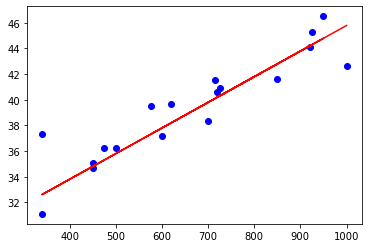

Coefficient: 0.8040289221432101


In [14]:
plt.figure()
plt.scatter(X_test, Y_test, color = 'b')
plt.plot(X_test, y_predicted, color = 'r')
plt.show()
print('Coefficient:', coef)

Just looking at the model, it seems pretty linear.  This is backed up with a .804 coefficient.  It is important to acknowledge that I am working witha  __very small dataset__ with few drastic outliers.  This plays heavily into my model's coefficient.  Now, lets look at some of our summary statistics on our models accuracy.

In [15]:
TP, FP, TN, FN = 0, 0, 0, 0
total = 35

for i in range(len(y_predicted)):
    if (y_predicted[i] <= (Y_test[1] + 1)) and (y_predicted[i] >= (Y_test[1] - 1)):
        TP += 1
    else:
        FP += 1

precision = TP / (TP + FP)
recall = TP / (TP+FN)
f1 = 2 * (precision * recall) / (precision + recall)

# Create confusion Matrix
confusion_matrix = pd.DataFrame([[TP, FP], [FN, TN]], index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Model Speed: ", prediction_time)
print(confusion_matrix)

Precision:  0.2222222222222222
Recall:  1.0
F1 Score:  0.3636363636363636
Model Speed:  0:00:00.000126
                 Predicted Positive  Predicted Negative
Actual Positive                   4                  14
Actual Negative                   0                   0


Since we are predicting with a linear regressor, it makes sense that we wouldnt have any true or false negatives. Consequently, our recall score of 1 makes sense following the same logic.  This is reflected in the confusion matrix above.  Our accuracy and F1 are lower than I expected, and continued to go lower as I played around with lowering my test size.  I believe that with a larger dataset, the model would perform much better under traditional analytics (precision and F1).  Using time-to-predict as a metric however, our model performs spectacularly well.  Again, I must point out that my small dataset plays very strongly into this result.  Nonetheless, it is crazy fast.